### Translation


The first row of the matrix is [1,0,tx], where tx is the number of pixels we will shift the image left or right. Negative values of tx will shift the image to the left and positive values will shift the image to the right.
Then, we define the second row of the matrix as [0, 1, ty ], where ty is the number of pixels we will shift the image up or down. Negative value of ty will shift the image up and positive values will shift the image down.

In [1]:
import numpy as np
import cv2 

In [2]:
image = cv2.imread("../DATA/colors.jpg")
cv2.imshow("Original", image)

In [5]:
M = np.float32([[1,0,25] , [0,1,50]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
cv2.imshow("Shifted down and right", shifted)
cv2.waitKey(0)

113

Using this notation, we can see on Line 14 that tx = 25 and ty = 50, implying that we are shifting the image 25 pix- els to the right and 50 pixels down.

In [6]:
M = np.float32([[1, 0, -50], [0, 1, -90]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape
[0]))
cv2.imshow("Shifted Up and Left", shifted)
cv2.waitKey(0)

113

#### let's put it in a function

In [ ]:
def translate(image, x, y):
    M = np.float32([[1, 0, x], [0, 1, y]])
    shifted = cv2.warpAffine(image, M, (image.shape[1], image.
        shape[0]))
    return shifted

### Rotation

In [8]:
(h, w) = image.shape[:2]
center=(w//2,h//2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(image, M, (w,h))
cv2.imshow("Rotated by 45 degrees" , rotated)
cv2.waitKey(0)


113

In [10]:
M = cv2.getRotationMatrix2D(center, -90, 1.0)
rotated = cv2.warpAffine(image, M, (w,h))
cv2.imshow("Rotated by -90 degrees" , rotated)
cv2.waitKey(0)

113

The cv2.getRotationMatrix2D function takes three argu- ments: the point at which we want to rotate the image around (in this case, the center of the image). We then specify θ, the number of degrees we are going to rotate the image by. In this case, we are going to rotate the image 45 degrees. The last argument is the scale of the image. We haven’t discussed resizing an image yet, but here you can specify a floating point value, where 1.0 means the same di-
50
6.1 image transformations
mensions of the image are used. However, if you specified a value of 2.0 the image would be doubled in size. Similarly, a value of 0.5 halves the size of the image.


In [11]:
def rotate(image, angle, center = None, scale = 1.0):
    (h, w) = image.shape[:2]
    if center is None:
       center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

### Resizing

In [12]:
r = 150.0 / image.shape[1] #defining our image new width
dim = (150, int(image.shape[0] * r))
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
cv2.imshow("Resized (Width)", resized)
cv2.waitKey(0)

115

The actual resizing of the image takes place on Line 17. The first argument is the image we wish to resize and the second is our computed dimensions for the new image.The last parameter is our interpolation method, which is the algorithm working behind the scenes to handle how the actual image is resized. In general, I find that using cv2. INTER_AREA obtains the best results when resizing; how- ever, other appropriate choices include cv2.INTER_LINEAR, cv2.INTER_CUBIC, and cv2.INTER_NEAREST.

In [13]:
r = 50.0 / image.shape[0] #defining our image new width
dim = (int(image.shape[1] * r), 50)
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
cv2.imshow("Resized (Height)", resized)
cv2.waitKey(0)

113

In [15]:
import imutils 

In [16]:
resized = imutils.resize(image, width = 100)
cv2.imshow("Resized via Function", resized)
cv2.waitKey(0)


113

### Flipping

In [18]:
flipped = cv2.flip(image, 1)
cv2.imshow("Flipped Horizontally", flipped)

cv2.waitKey(0)

113

In [19]:
flipped = cv2.flip(image, 0)
cv2.imshow("Flipped Vertically", flipped)

cv2.waitKey(0)

113

In [20]:
flipped = cv2.flip(image, -1)
cv2.imshow("Flipped Horizontally and Vertically", flipped)

cv2.waitKey(0)

113

### Cropping

In [21]:
cropped = image[30:120, 240:335]
cv2.imshow("Cropped" , cropped)
cv2.waitKey(0)

113

### Arithmetics

In [22]:
M = np.ones(image.shape, dtype = "uint8") * 100


113

In [24]:
M = np.ones(image.shape, dtype = "uint8") * 50
subtracted = cv2.subtract(image, M)
cv2.imshow("subtracted",subtracted)
cv2.waitKey(0)

113

### Bitwise Operations

In [25]:
rectangle = np.zeros((300, 300), dtype = "uint8")
cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)
cv2.imshow("Rectangle", rectangle)

circle = np.zeros((300, 300), dtype = "uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)
cv2.imshow("Circle", circle)

cv2.waitKey(0)

113

In [26]:

bitwiseAnd = cv2.bitwise_and(rectangle, circle)
cv2.imshow("AND", bitwiseAnd)
cv2.waitKey(0)
bitwiseOr = cv2.bitwise_or(rectangle, circle)
cv2.imshow("OR", bitwiseOr)
cv2.waitKey(0)

bitwiseXor = cv2.bitwise_xor(rectangle, circle)
cv2.imshow("XOR", bitwiseXor)
cv2.waitKey(0)

bitwiseNot = cv2.bitwise_not(circle)
cv2.imshow("NOT", bitwiseNot)
cv2.waitKey(0)

113

AND: A bitwise AND is true if and only if both pixels are greater than zero.
2. OR: A bitwise OR is true if either of the two pixels are greater than zero.
3. XOR: A bitwise XOR is true if and only if either of the two pixels are greater than zero, but not both.
4. NOT:AbitwiseNOTinvertsthe“on”and“off”pixels in an image

### Masking

In [27]:
mask = np.zeros(image.shape[:2], dtype = "uint8")
(cX, cY) = (image.shape[1] // 2, image.shape[0] // 2)
cv2.rectangle(mask, (cX - 75, cY - 75), (cX + 75 , cY + 75), 255,
-1)
cv2.imshow("Mask", mask)
cv2.waitKey(0)

113

In [29]:
masked = cv2.bitwise_and(image, image, mask = mask)
cv2.imshow("Mask Applied to Image", masked)
cv2.waitKey(0)

113

In [30]:
mask = np.zeros(image.shape[:2], dtype = "uint8")
cv2.circle(mask, (cX, cY), 100, 255, -1)
masked = cv2.bitwise_and(image, image, mask = mask)
cv2.imshow("Mask", mask)
cv2.imshow("Mask Applied to Image", masked)
cv2.waitKey(0)

113

### Color Spaces

In [ ]:

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray", gray)

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
cv2.imshow("HSV", hsv)

lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
cv2.imshow("L*a*b*", lab)
cv2.waitKey(0)

### Histograms

So, what exactly is a histogram? A histogram represents the distribution of pixel intensities (whether color or gray- scale) in an image. It can be visualized as a graph (or plot) that gives a high-level intuition of the intensity (pixel value) distribution. We are going to assume an RGB color space in this example, so these pixel values will be in the range of 0 to 255.


By simply examining the histogram of an image, you get a general understanding regarding the contrast, brightness,
and intensity distribution.

In [6]:
import matplotlib.pyplot as plt
image = cv2.imread("../data/grayscale_image.jpg")
image =  cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

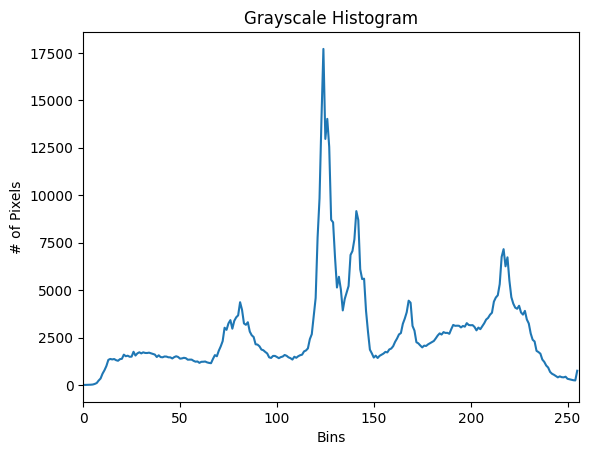

In [7]:
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

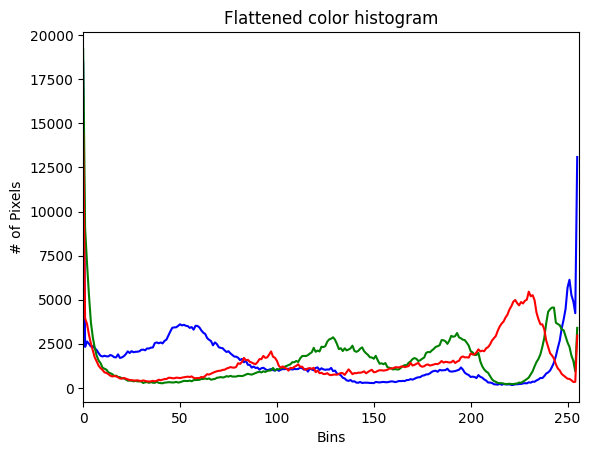

In [11]:
image = cv2.imread("../data/colors.jpg")
chans = cv2.split(image)
colors = ("b" , "g" , "r")
plt.figure()
plt.title("Flattened color histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

for (chan, color) in zip(chans, colors):
    hist = cv2.calcHist([chan],[0],None,[256],[0,256])
    plt.plot(hist, color=color)
    plt.xlim([0,256])

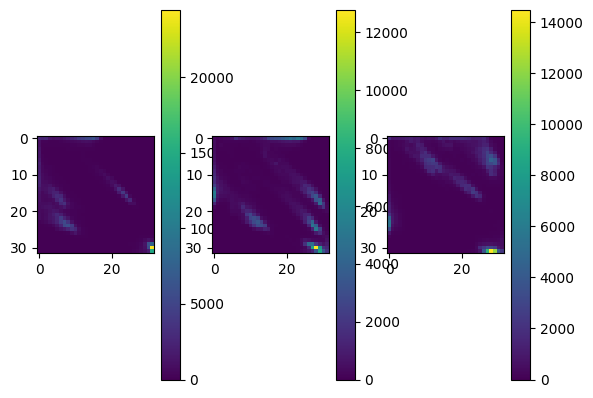

In [15]:
fig = plt.figure() 
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None,
[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
# ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)

ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None,
[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
# ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)
ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None,
[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
# ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)


In [16]:
hist = cv2.calcHist([image], [0, 1, 2],
    None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(
    hist.shape, hist.flatten().shape[0]))
plt.show()

3D histogram shape: (8, 8, 8), with 512 values


### Smoothing and Blurring

Practically, this means that each pixel in the image is mixed in with its surrounding pixel intensities. This “mix- ture” of pixels in a neighborhood becomes our blurred pixel

While this effect is usually unwanted in our photographs, it’s actually quite helpful when performing image process- ing tasks.


In [18]:
## Blurring
image = cv2.imread("../data/colors.jpg")

#### Averaging

In [19]:
blurred = np.hstack(
    [
        cv2.blur(image, (3,3)),
        cv2.blur(image, (5,5)),
        cv2.blur(image, (7,7))
    ]
)
cv2.imshow("Averaged" , blurred)
cv2.waitKey(0)

113

#### Guassian

In [20]:
blurred = np.hstack(
    [
        cv2.GaussianBlur(image, (3,3), 0),
        cv2.GaussianBlur(image, (5,5), 0),
        cv2.GaussianBlur(image, (7,7), 0 )
    ]
)
cv2.imshow("Guassian " , blurred)
cv2.waitKey(0)

113

The last parameter is our σ, the standard deviation in the x-axis direction. By setting this value to 0, we are instruct- ing OpenCV to automatically compute them based on our kernel size.

We can see the output of our Gaussian blur in Figure 8.3. Our images have less of a blur effect than when using the averaging method in Figure 8.2; however, the blur itself is more natural due to the computation of the weighted mean, rather than allowing all pixels in the kernel neighborhood to have equal weight.



#### Median

In [22]:
blurred = np.hstack(
    [
        cv2.medianBlur(image,3),
        cv2.medianBlur(image, 5),
        cv2.medianBlur(image,7)
    ]
)
cv2.imshow("Median" , blurred)
cv2.waitKey(0)

113